# Text Classification Challenge with MLFlow Tracking

## Introduction

In this project, we aim to implement a **text classification model** using MLOps principles, with a particular focus on **MLFlow for experiment tracking**. Text classification is a fundamental problem in natural language processing (NLP) that enables businesses to derive actionable insights from unstructured text data, enhancing decision-making and customer understanding. In this analysis, we will explore various machine learning algorithms to predict and classify sentiment from text, which has applications in areas like customer feedback analysis, social media monitoring, and support ticket prioritization.

This project will cover end-to-end text processing, from data preprocessing and feature engineering to model development and evaluation, providing hands-on experience in both machine learning and MLOps workflows. By systematically tracking experiments with MLFlow, we aim to maintain a structured process that enhances reproducibility, comparability, and insight discovery, ultimately leading to an optimal text classification model.

## Objective

The main goal of this project is to design, implement, and fine-tune a **predictive model for text classification** that can accurately classify text data based on sentiment. Key objectives include:

- **Data Acquisition and Preparation**: Collecting and preparing a unique text dataset to ensure suitability for sentiment analysis.
- **Text Preprocessing and Feature Engineering**: Applying NLP techniques such as lemmatization, stop word removal, and TF-IDF encoding to clean and structure the text data for machine learning.
- **Model Development and Hyperparameter Tuning**: Implementing and tuning multiple machine learning models, including Logistic Regression, SVM, Random Forest, and more, to compare and identify the best-performing model.
- **Systematic Experiment Tracking with MLFlow**: Logging and tracking model performance, hyperparameters, and artifacts across experiments using MLFlow to enhance the project's reproducibility and comparability.
- **Critical Analysis and Interpretation**: Evaluating model performance through metrics like accuracy, precision, and recall, and discussing findings to draw actionable insights from the results.

By achieving these objectives, we aim to develop a robust text classification solution while gaining practical experience in deploying MLOps best practices with MLFlow.

---

### Loading the libraries required


In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, precision_recall_curve, average_precision_score,roc_curve, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

np.random_seed = 57041785

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Download NLTK data (if needed)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhijith
[nltk_data]     Nallana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up

True

## Data Load:
Loading the dataset 

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "C:/Users/Abhijith Nallana/Downloads/sentimentdatasetupdated.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
data.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/23 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,1/15/23 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/23 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/23 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/23 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


### Dataset Overview
This dataset contains social media posts along with metadata to analyze user sentiments. It consists of 732 entries with 15 columns, providing insights into user emotions, platform usage, and post engagement. Below is a description of each column:

#### Columns
- **Text:** Content of the social media post.
- **Sentiment:** The sentiment classification of the post (e.g., Positive, Negative, Neutral).
- **Timestamp:** Date and time when the post was created.
- **User:** The username of the individual who posted the content.
- **Platform:** The social media platform where the post was made (e.g., Twitter, Instagram, Facebook).
- **Hashtags:** Hashtags included in the post.
- **Retweets:** Number of retweets or shares for the post.
- **Likes:** Number of likes the post received.
- **Country:** Country of the user.
- **Year:** Year the post was created.
- **Month:** Month the post was created.
- **Day:** Day of the month when the post was created.
- **Hour:** Hour of the day the post was created.

In [3]:
# Check for null values and data types
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Sentiment     732 non-null    object
 4   Timestamp     732 non-null    object
 5   User          732 non-null    object
 6   Platform      732 non-null    object
 7   Hashtags      732 non-null    object
 8   Retweets      732 non-null    int64 
 9   Likes         732 non-null    int64 
 10  Country       732 non-null    object
 11  Year          732 non-null    int64 
 12  Month         732 non-null    int64 
 13  Day           732 non-null    int64 
 14  Hour          732 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 85.9+ KB


Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

The dataset used in this assignment is structured for a text classification problem. Below is a preview of the first few rows to understand its format and the key features for our analysis.

- **Text Column**: Contains the text data for classification.
- **Target Column**: Contains the labels or classes for the classification task.

Initial analysis of the dataset's structure:
- Shape: `(num_rows, num_columns)`
- Missing values and data types for each column:


### Text Preprocessing
The following code snippet prepares the text data for machine learning by applying several preprocessing steps, including tokenization, lowercasing, stop word removal, and lemmatization. This results in a cleaner text dataset, ideal for natural language processing (NLP) tasks.



In [4]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['processed_text'] = data['Text'].apply(preprocess_text)

In [5]:
X = data['processed_text']
y = data['Sentiment']
print(y.unique())

[' Positive  ' ' Negative  ' ' Neutral   ']


**The Sentiment column in the dataset is scaled using three distinct classes:**

- **Class 1:** Positive - Represents posts with positive sentiment, capturing emotions such as happiness, excitement, or satisfaction.
- **Class 2:** Negative - Represents posts with negative sentiment, indicating emotions like frustration, dissatisfaction, or disappointment.
- **Class 3:** Neutral - Represents posts with a neutral sentiment, where the tone is informational or non-opinionated, without strong positive or negative emotions.

## Test-Train Split
This code snippet splits the dataset into training and testing sets, and provides a preview of the data shapes and samples for both features and target labels. The split aims to reserve 20% of the data for testing, leaving 80% for training.

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
X_train_df = pd.DataFrame(X_train)
X_train.head(10)
y_train[:5]

683     Negative  
250     Positive  
336     Positive  
260     Positive  
439     Negative  
Name: Sentiment, dtype: object

## Data Preprocessing

Effective preprocessing is essential for text classification. The steps include:
1. **Text Lemmatization**: Reducing words to their base forms.
2. **Stop Word Removal**: Removing words that do not contribute to model predictiveness.
3. **Dimensionality Reduction**: Using SVD to limit feature dimensions.
4. **TF-IDF Transformation**: Converting text data into a matrix of TF-IDF features.


In [7]:
# Convert text data into TF-IDF features
tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf_vect.fit_transform(X_train)
X_test_vec = tfidf_vect.transform(X_test)

# Dimensionality reduction using SVD
svd = TruncatedSVD(n_components=300, n_iter=10)
X_train_svd = svd.fit_transform(X_train_vec)
X_test_svd = svd.transform(X_test_vec)

X_train_svd.shape, X_test_svd.shape

print(X_train_svd)

[[ 0.13021227  0.04893406  0.0736852  ... -0.0335516   0.01635999
  -0.02064008]
 [ 0.07265226 -0.02592937  0.01510132 ... -0.01932718  0.00465429
  -0.01015386]
 [ 0.05269163 -0.03896597  0.01466409 ...  0.00300222 -0.01822498
  -0.005096  ]
 ...
 [ 0.05417018 -0.03466139 -0.12257891 ... -0.01370662  0.00109032
   0.00987645]
 [ 0.04101512 -0.01354055  0.02476721 ...  0.05457487 -0.04395334
  -0.03873392]
 [ 0.0417255   0.00595657 -0.00473695 ...  0.07741151 -0.04559545
   0.01361928]]


In [8]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_text'])

# Dimensionality reduction using SVD
svd = TruncatedSVD(n_components=300)  # Adjust component count as needed
tfidf_reduced = svd.fit_transform(tfidf_matrix)

### Data Imbalance

Let us now check if data imbalance exists in our current dataset. If yes, we will apply SMOTE to address it

Sentiment
Positive      0.755464
Negative      0.219945
Neutral       0.024590
Name: proportion, dtype: float64


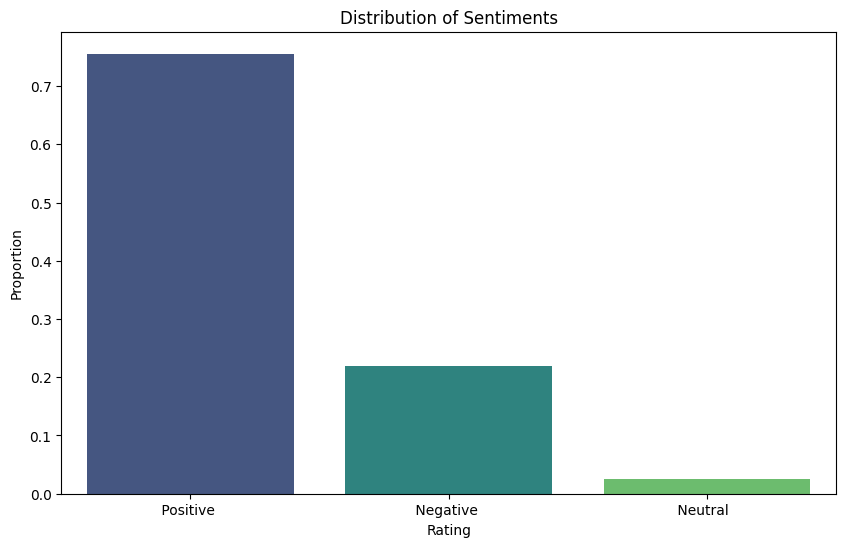

In [9]:

# Check the distribution of the target variable (ratings)
rating_counts = y.value_counts(normalize=True) # Get the percentage of each rating
print(rating_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Distribution of Sentiments')
plt.show()

The output shows the distribution of the ratings:

- **Rating 4:** 66.3% of the reviews have this rating, making it the most common.
- **Rating 3:** 28.7% of the reviews are rated as 3.
- **Rating 2:** 3.3% of the reviews fall under this rating.
- **Rating 5:** 1.8% of the reviews are rated as 5.

This distribution indicates a significant imbalance, with most reviews rated as 3 or 4, while ratings of 2 and 5 are much less frequent. To address this, we will use SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples for the minority classes to balance the dataset.

### Applying SMOTE

Distribution after SMOTE:
 Sentiment
Negative      0.333333
Positive      0.333333
Neutral       0.333333
Name: proportion, dtype: float64


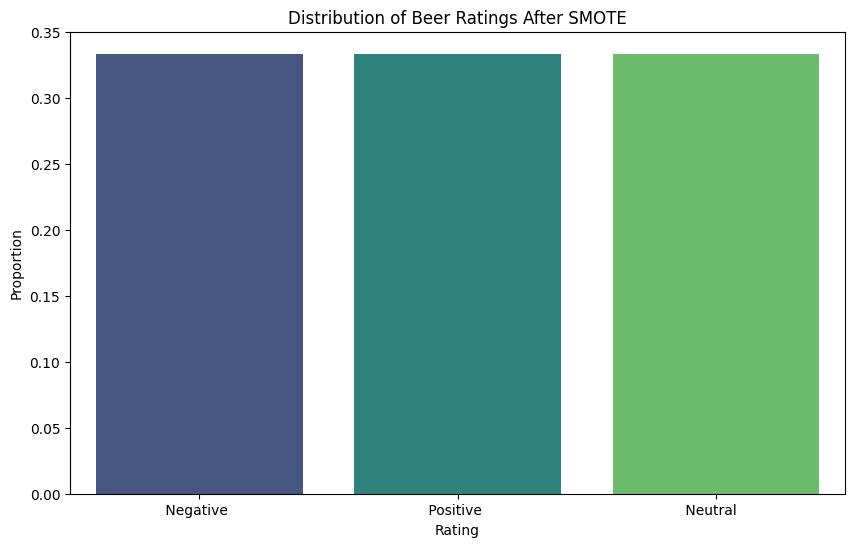

In [10]:

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_svd_balanced, y_train_balanced = smote.fit_resample(X_train_svd, y_train)

# Display the new distribution of the target variable after SMOTE
balanced_counts = pd.Series(y_train_balanced).value_counts(normalize=True)
print("Distribution after SMOTE:\n", balanced_counts)

# Plot the new distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette="viridis")
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Distribution of Beer Ratings After SMOTE')
plt.show()


## Model Development and Testing

Seven different machine learning models will be implemented, and hyperparameter tuning will be performed to optimize each model. The models include:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree
5. Random Forest
6. AdaBoost
7. XGBoost


## Model Tracking with MLFlow
This code snippet performs hyperparameter tuning on a selection of machine learning models using GridSearchCV, followed by logging model performance metrics in MLFlow. This approach helps find the best combination of hyperparameters for each model and tracks each experiment in MLFlow, making it easier to manage and compare models.

### Target Label Encoding
In this section, we encode the target labels (i.e., sentiment classes) as integers. This encoding step is crucial for machine learning models, which typically require numerical input for the target variable.

In [11]:
# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

### Hyperparameter Tuning and Model logging
Performing hyperparameter tuning on a selection of machine learning models using GridSearchCV, followed by logging model performance metrics in MLFlow. This approach helps find the best combination of hyperparameters for each model and tracks each experiment in MLFlow, making it easier to manage and compare models.

In [12]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a list of models with hyperparameters to tune
models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 1]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}

# Set the tracking URI to the local MLFlow server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set up MLFlow experiment tracking
mlflow.set_experiment("Text Classification with Hyperparameter Tuning")

<Experiment: artifact_location='mlflow-artifacts:/345893478012210996', creation_time=1730069217383, experiment_id='345893478012210996', last_update_time=1730069217383, lifecycle_stage='active', name='Text Classification with Hyperparameter Tuning', tags={}>

In [13]:
# Train models with hyperparameter tuning and log performance with MLFlow
for model_name, model_info in models_with_params.items():
    # Set up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=3, scoring="accuracy")
    
    with mlflow.start_run(run_name=f"{model_name} Run"):
        try:
            # Train the model with GridSearchCV
            grid_search.fit(X_train_svd_balanced, y_train_encoded)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            
            # Make predictions on the test set
            predictions = best_model.predict(X_test_svd)
            
            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test_encoded, predictions)
            precision = precision_score(y_test_encoded, predictions, average="weighted", zero_division=0)
            recall = recall_score(y_test_encoded, predictions, average="weighted", zero_division=0)
    
            # Log best parameters, model, and metrics with MLFlow
            mlflow.log_params(best_params)
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
    
            # Compute confusion matrix
            cm = confusion_matrix(y_test_encoded, predictions)
            
            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix for {model_name}")
            
            # Save the confusion matrix as an image
            confusion_matrix_path = f"{model_name}_confusion_matrix.png"
            plt.savefig(confusion_matrix_path)
            plt.close()
            
            # Log confusion matrix as an artifact in MLFlow
            mlflow.log_artifact(confusion_matrix_path)
    
            # Log the best model
            mlflow.sklearn.log_model(best_model, model_name, input_example=X_test_svd[:1])
    
            print(f"{model_name} - Best Params: {best_params}")
            print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
        except Exception as e:
            print(f"Failed to log {model_name} due to error: {e}")

2024/10/27 19:24:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/1dbcbf4a1cfe412d9f8224db7f32d633.
2024/10/27 19:24:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


Logistic Regression - Best Params: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression - Accuracy: 0.85, Precision: 0.85, Recall: 0.85


2024/10/27 19:24:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/0f435f5757e94e869db3b9e9fcdabc63.
2024/10/27 19:24:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


KNN - Best Params: {'n_neighbors': 3, 'weights': 'distance'}
KNN - Accuracy: 0.55, Precision: 0.84, Recall: 0.55


2024/10/27 19:25:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/69c556954d684a79b39560ea8c2ea598.
2024/10/27 19:25:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


SVM - Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Accuracy: 0.82, Precision: 0.83, Recall: 0.82


2024/10/27 19:25:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/adb2c615a391470eb27dff5d3881b3a0.
2024/10/27 19:25:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.67, Precision: 0.72, Recall: 0.67


2024/10/27 19:29:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/996540f03948472cba058088485752d6.
2024/10/27 19:29:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Accuracy: 0.82, Precision: 0.82, Recall: 0.82


2024/10/27 19:33:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run AdaBoost Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/8d283833be4549fca793b84a5e8f86ad.
2024/10/27 19:33:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


AdaBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost - Accuracy: 0.75, Precision: 0.73, Recall: 0.75


2024/10/27 19:40:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost Run at: http://127.0.0.1:5000/#/experiments/345893478012210996/runs/0833d39551ba4793acb0a7e8f9d0e761.
2024/10/27 19:40:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/345893478012210996.


XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost - Accuracy: 0.80, Precision: 0.80, Recall: 0.80


### MLFlow Experiment Results

In this section, we document the experiment results, including model metrics, hyperparameters, and confusion matrices for each model used in the text classification task.

### Logistic Regression Metrics

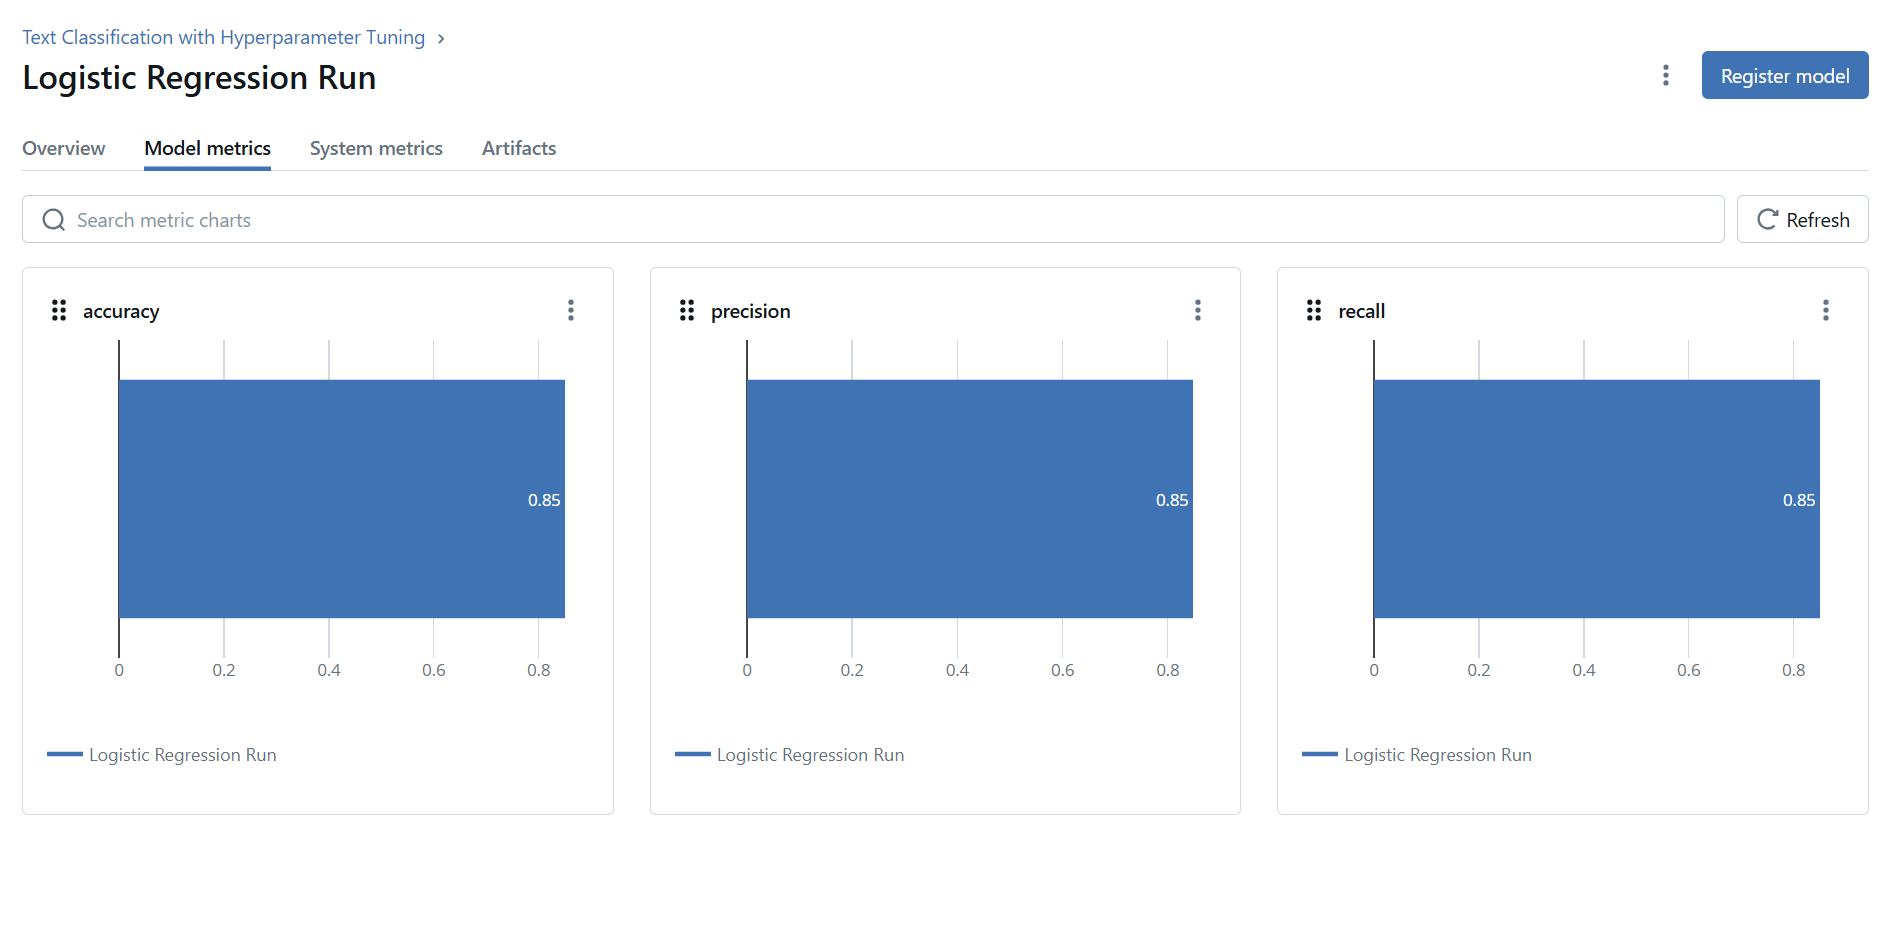
        

### K-Nearest Neighbors Metrics

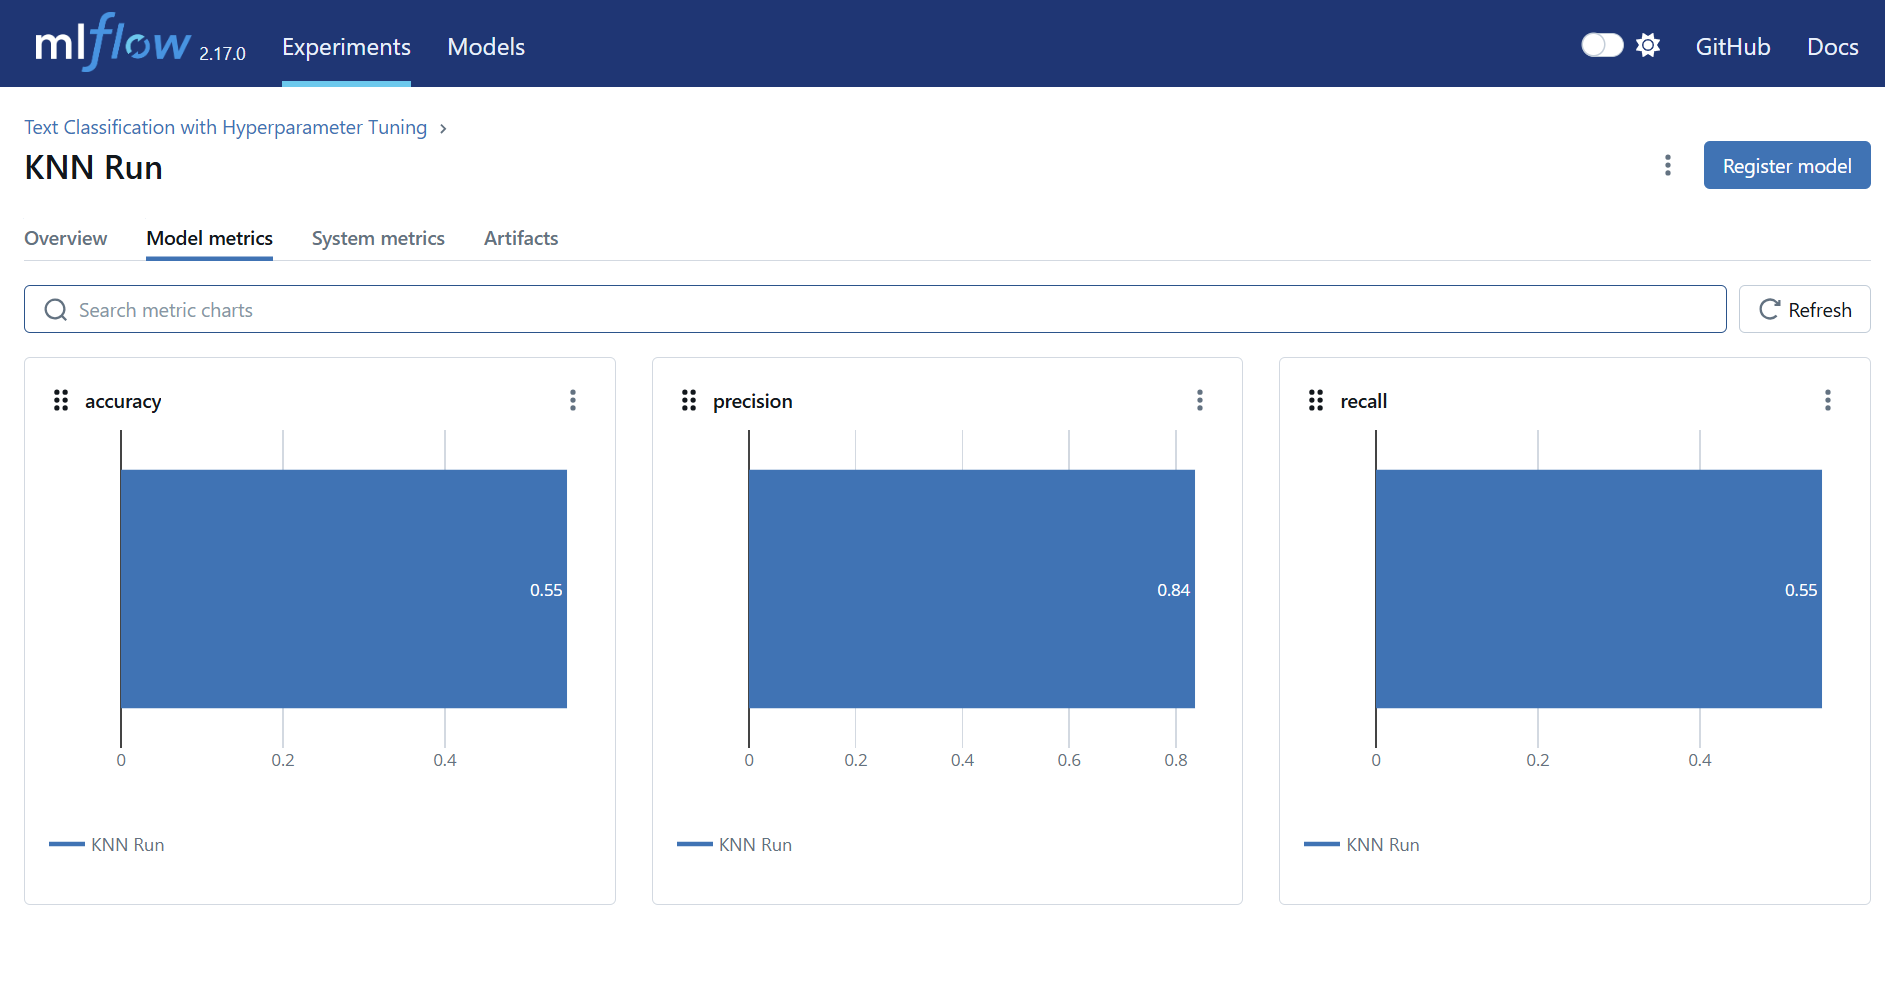
        

### Support Vector Machine Metrics

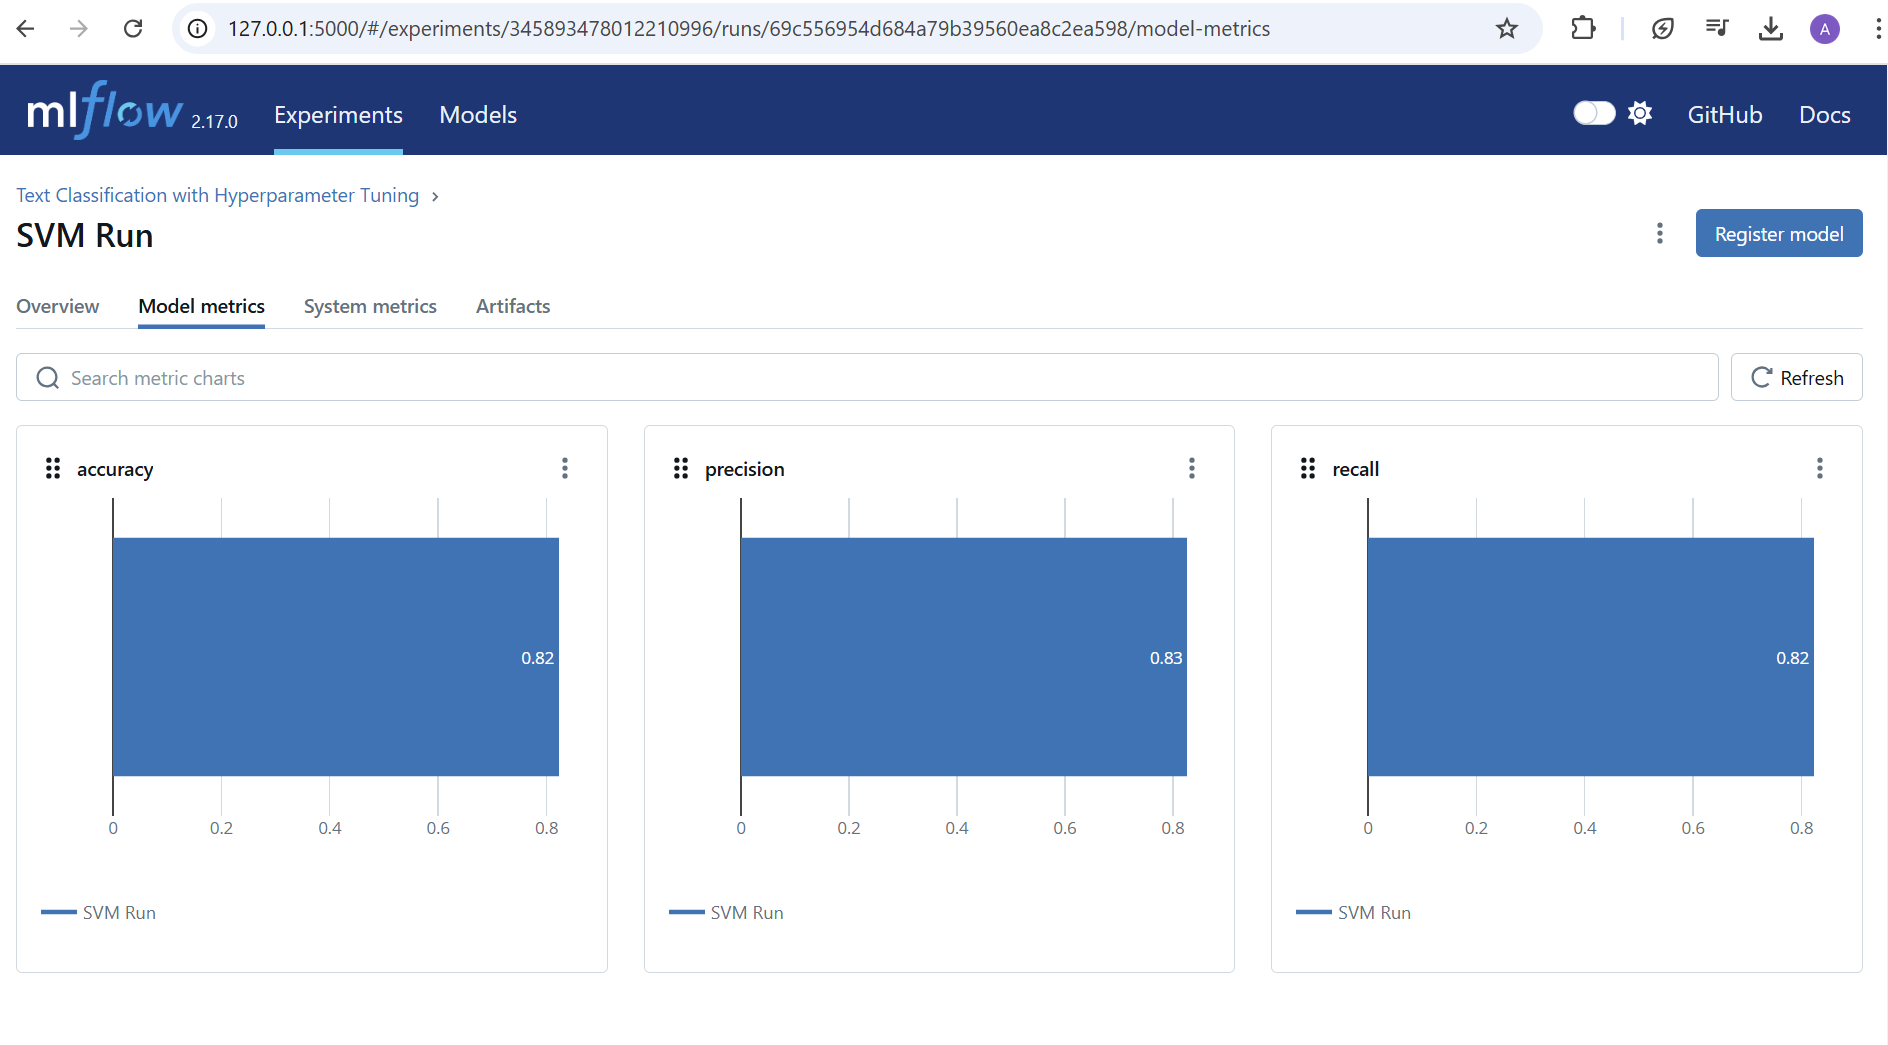
        

### Decision Tree Metrics

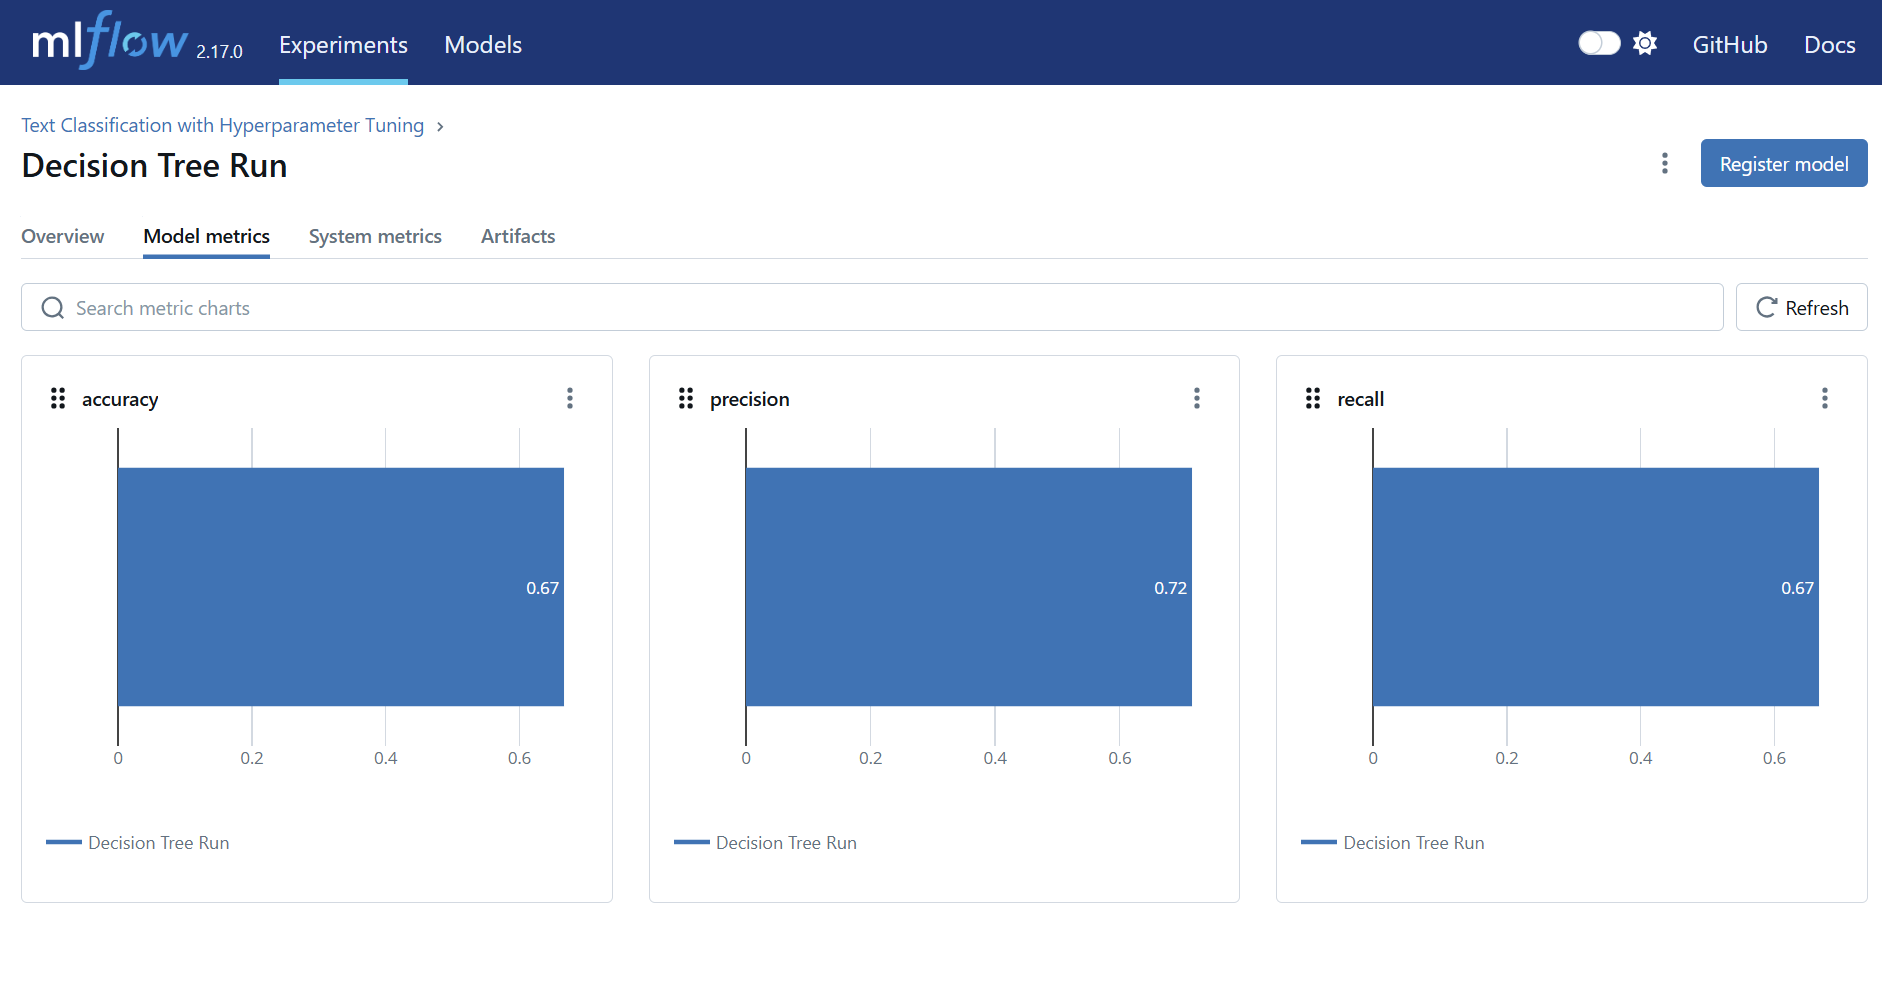
        

### Random Forest Metrics

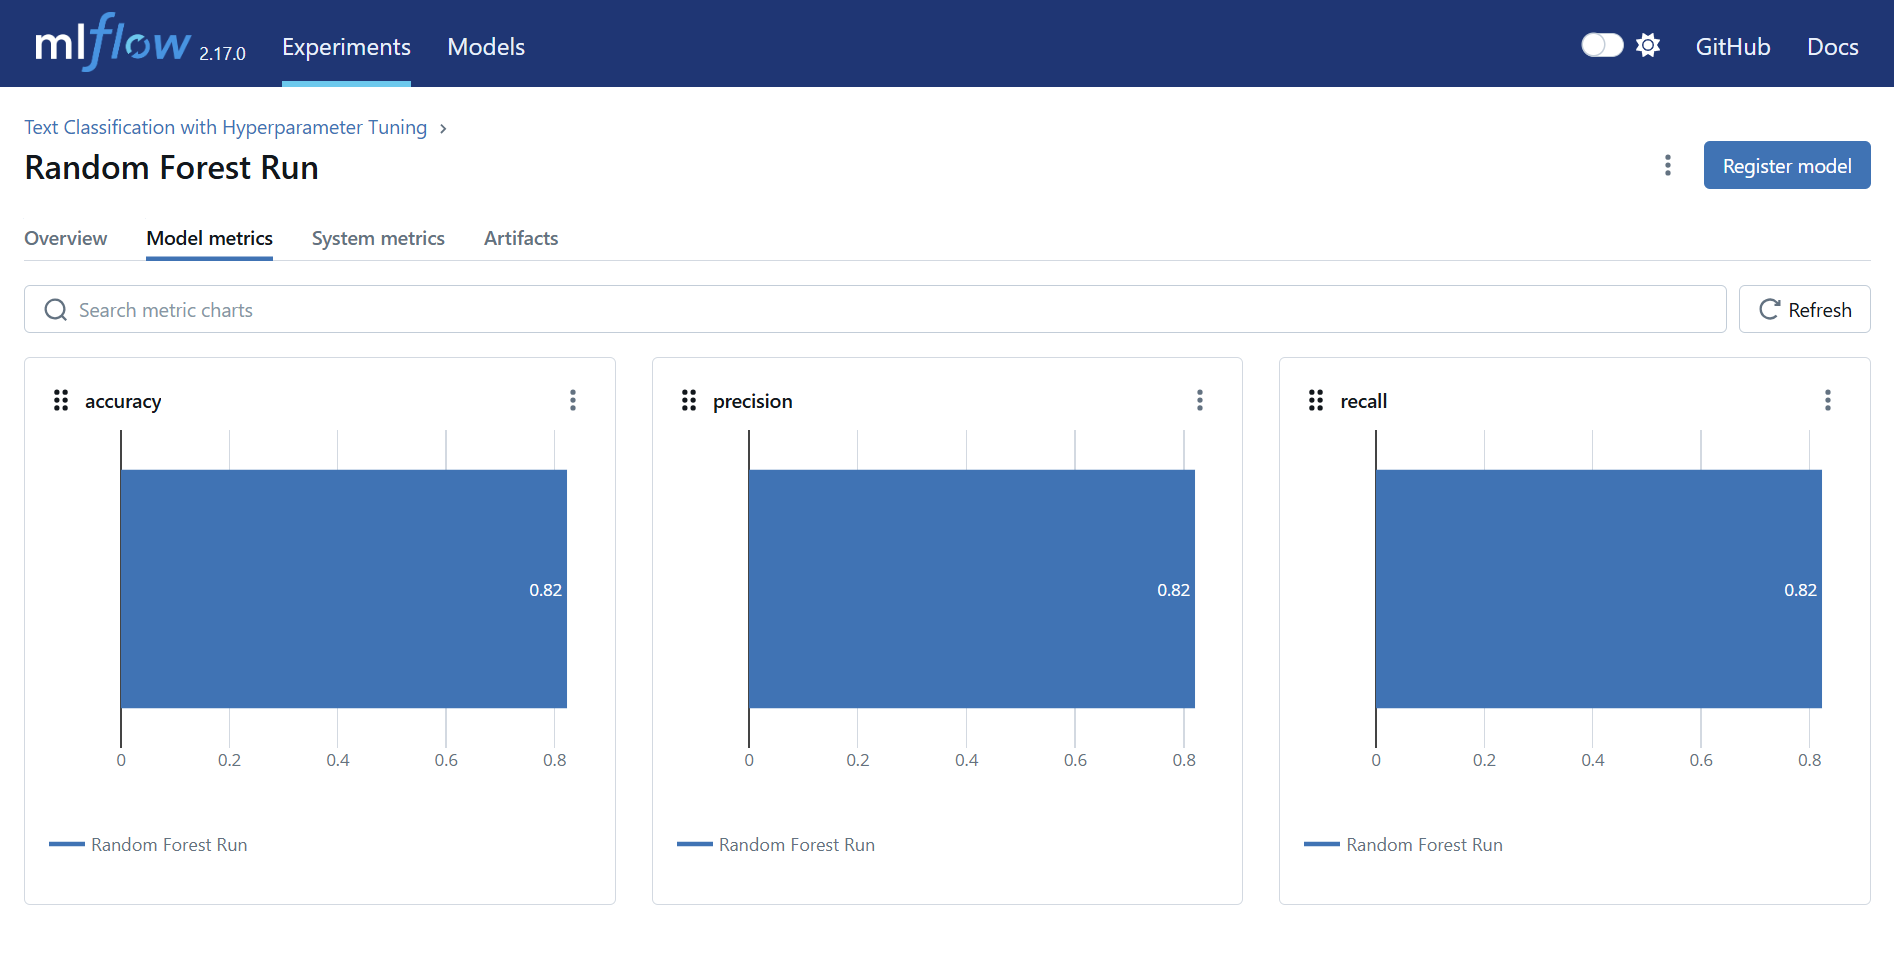
        

### AdaBoost Metrics

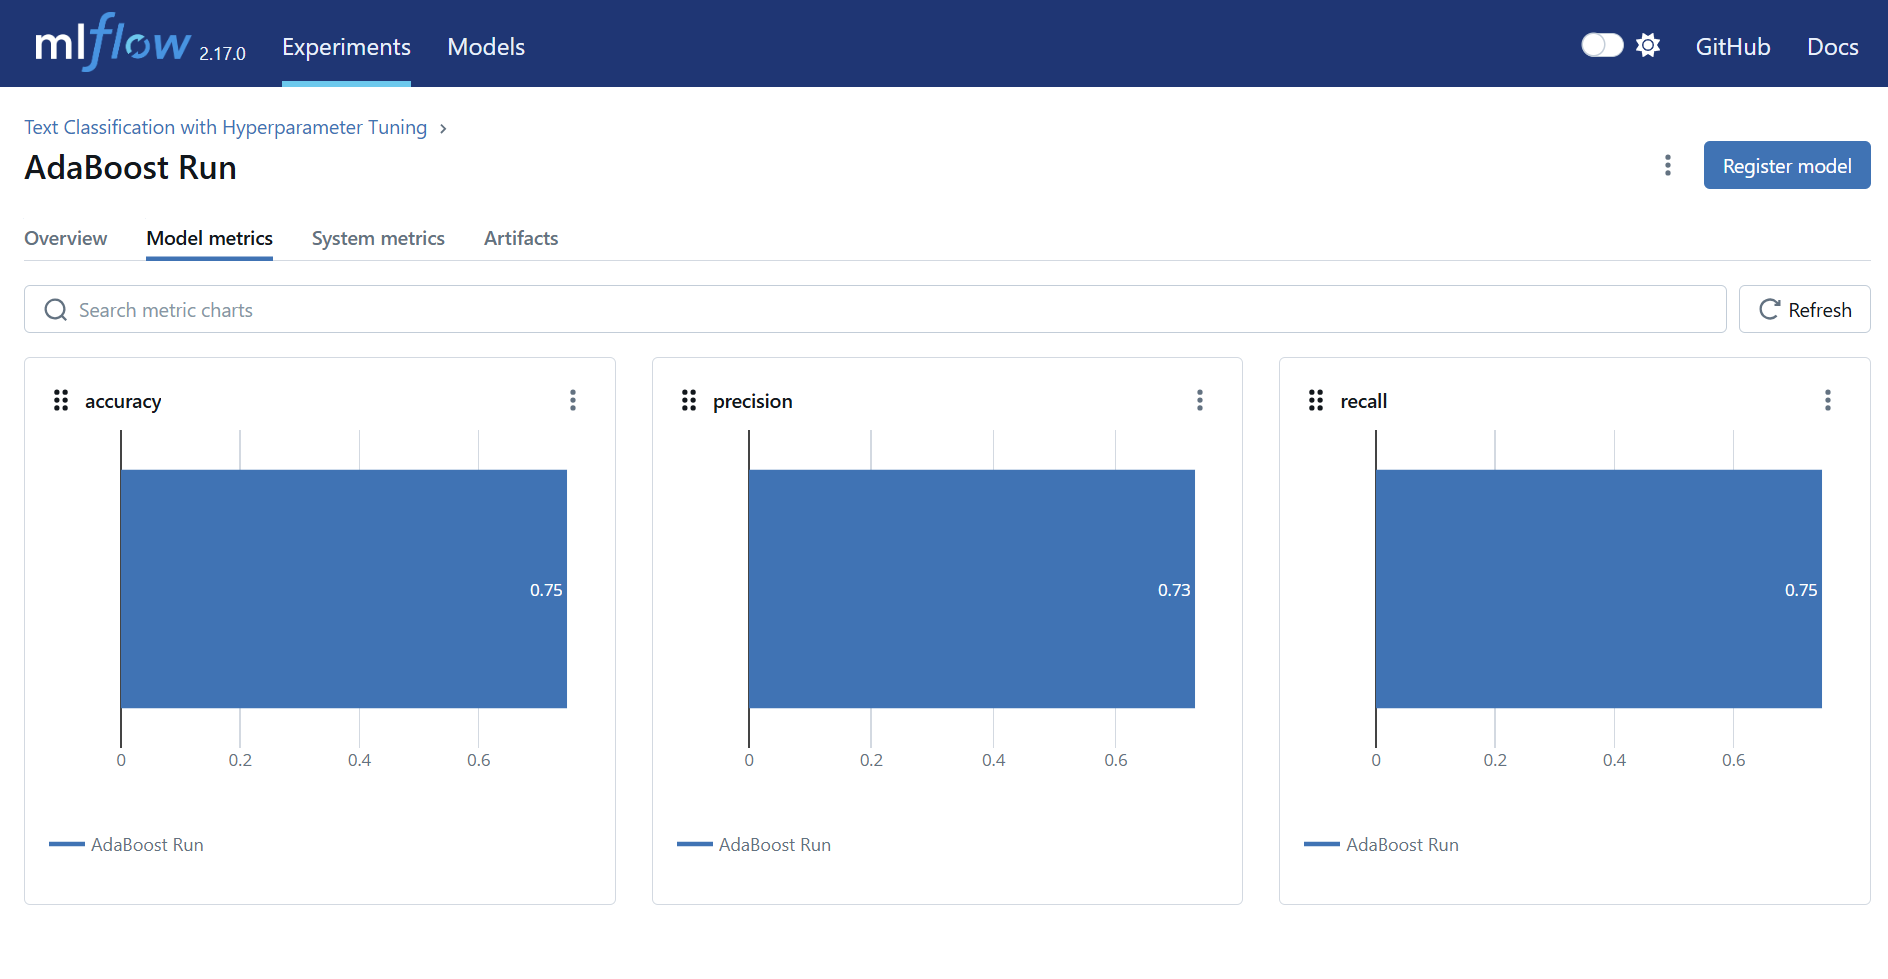
        

### XGBoost Metrics

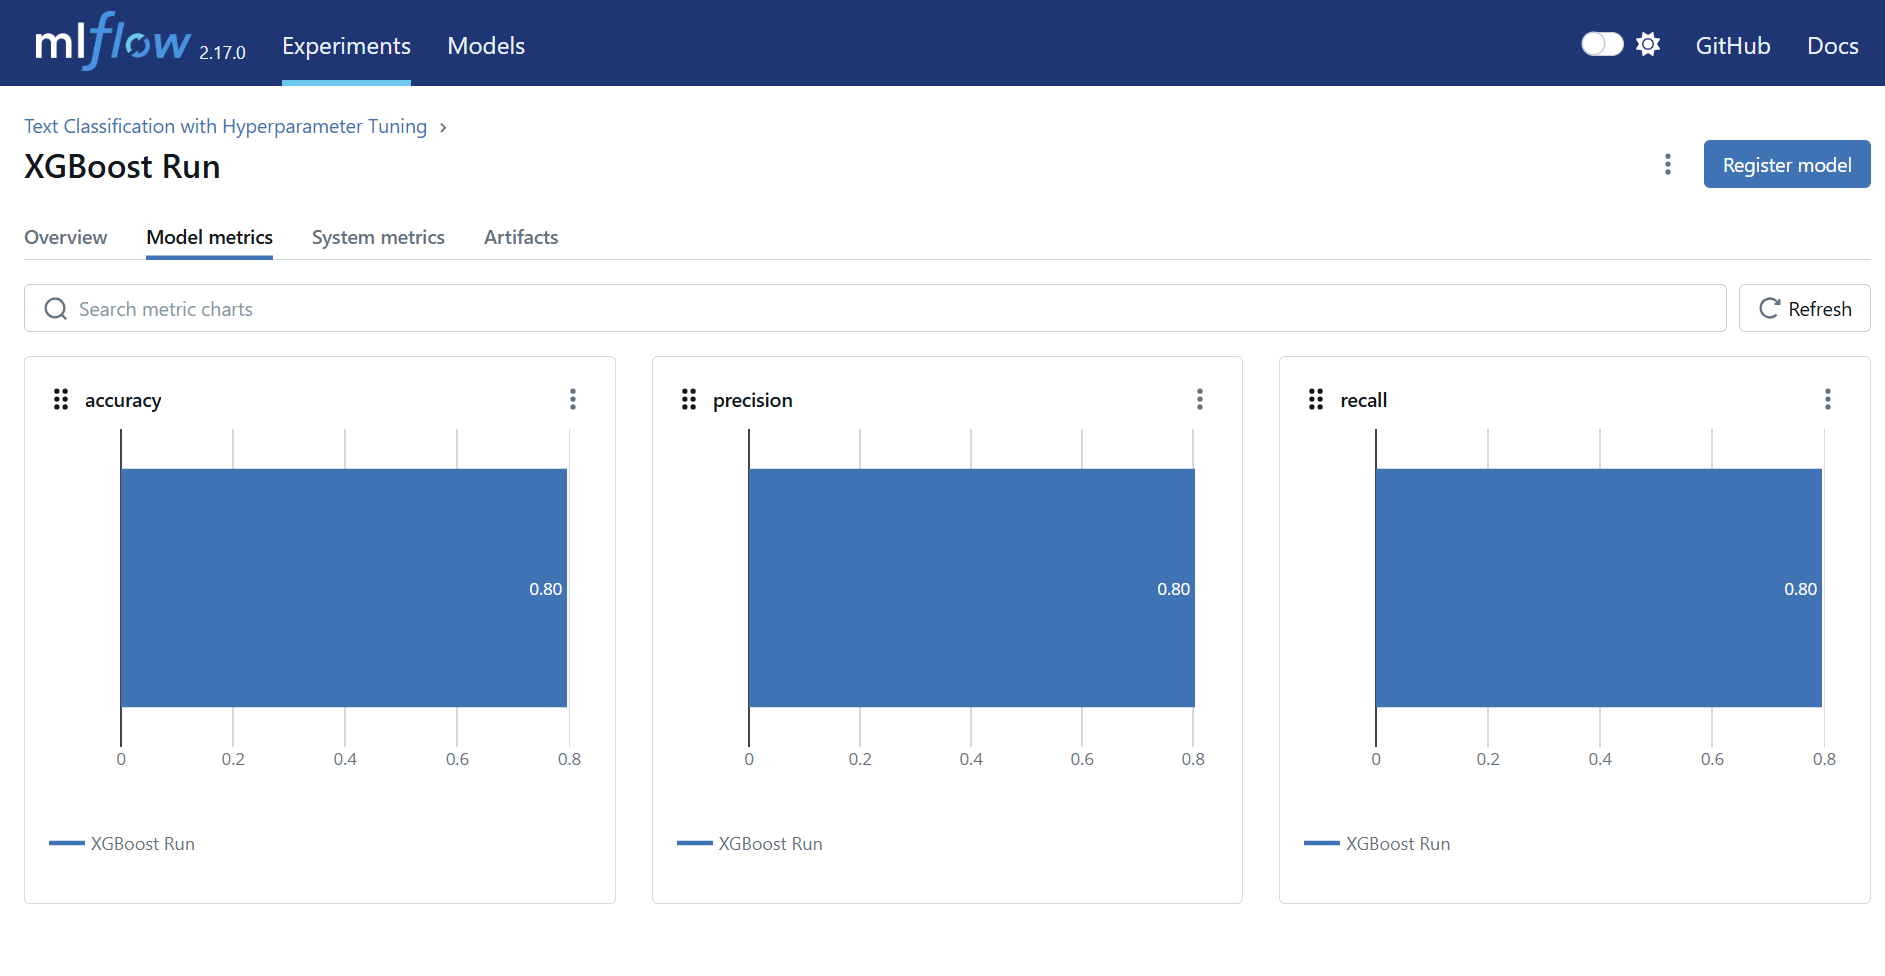
        

### Logistic Regression Confusion Matrix

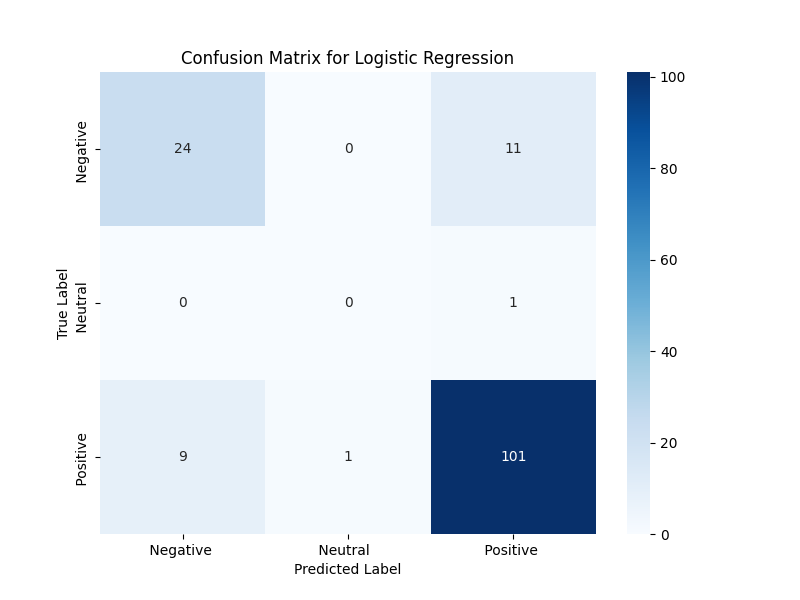
        

### K-Nearest Neighbors Confusion Matrix

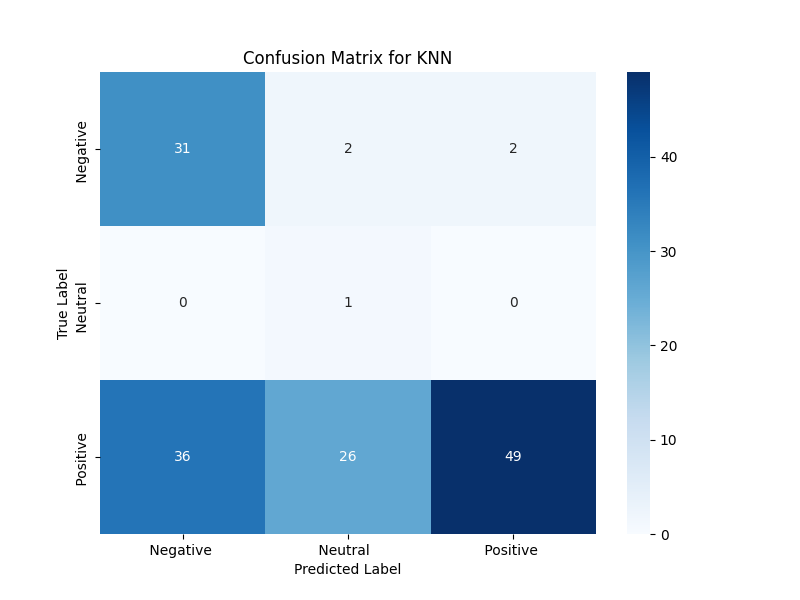
        

### Support Vector Machine Confusion Matrix

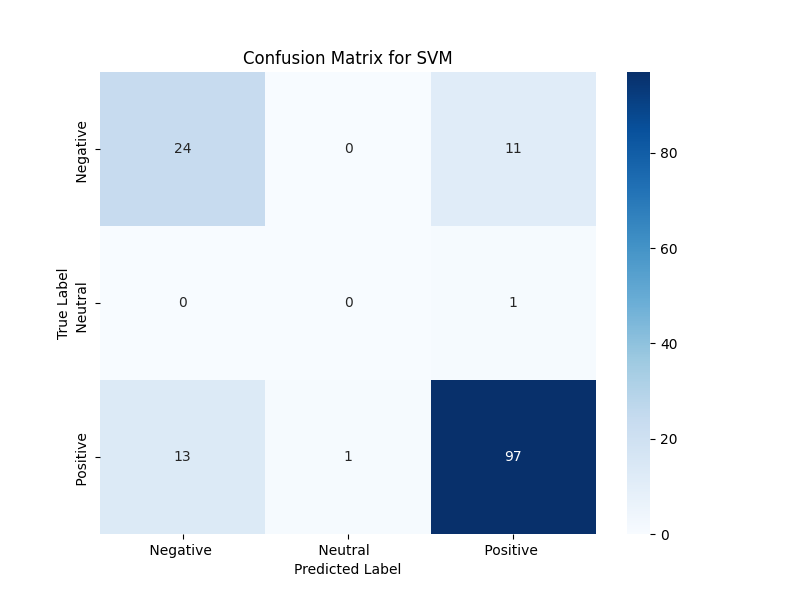
        

### Decision Tree Confusion Matrix

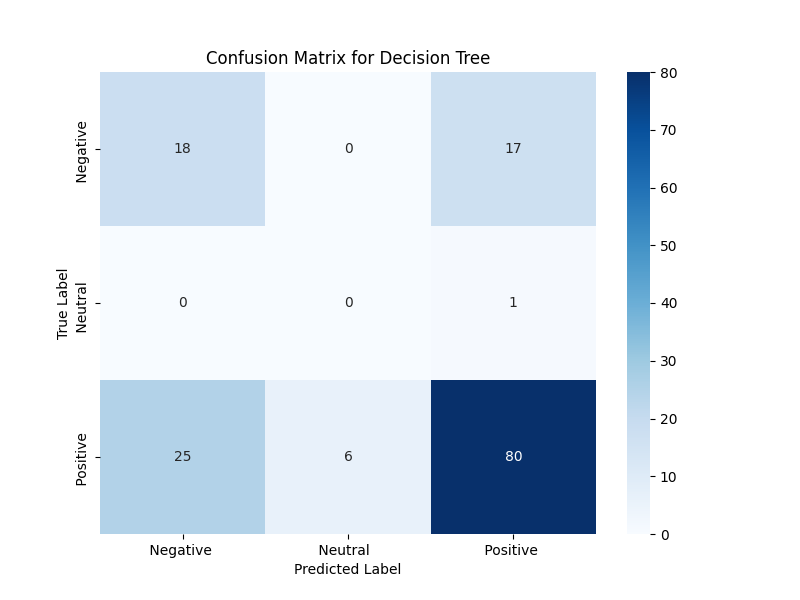
        

### Random Forest Confusion Matrix

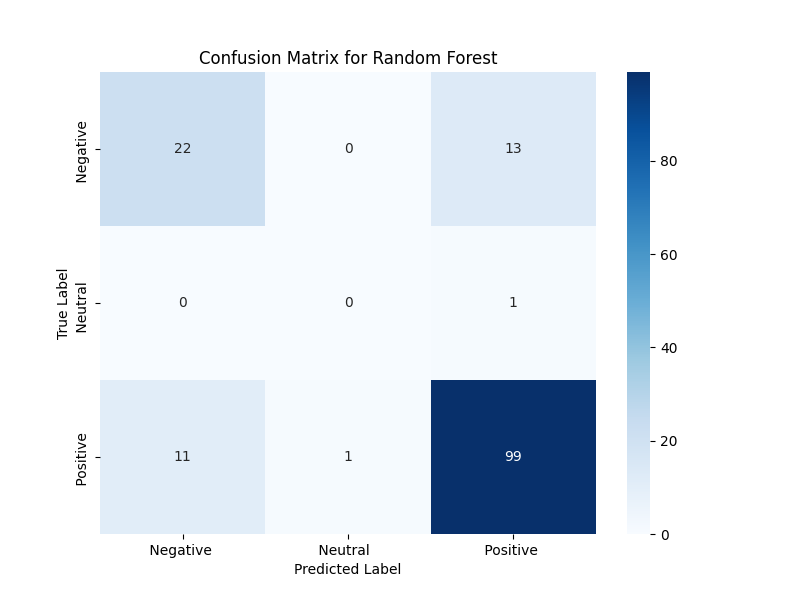
        

### AdaBoost Confusion Matrix

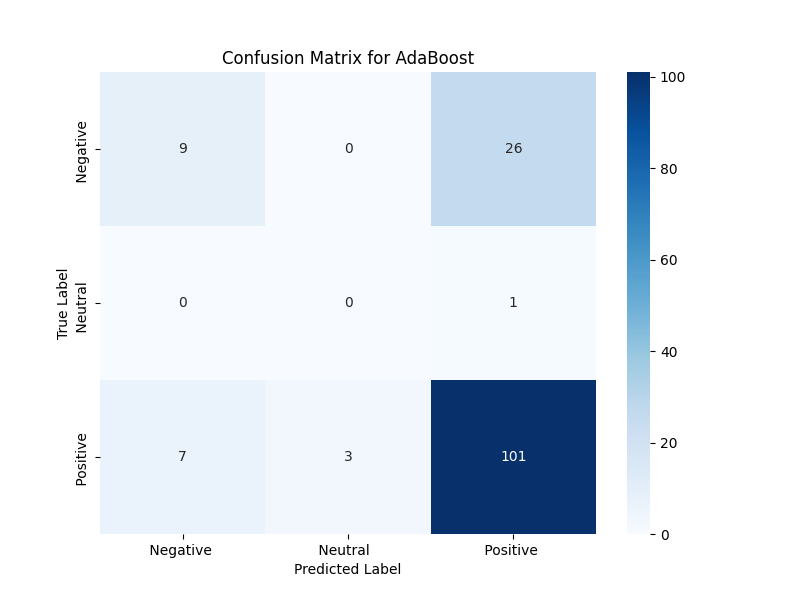
        

### XGBoost Confusion Matrix

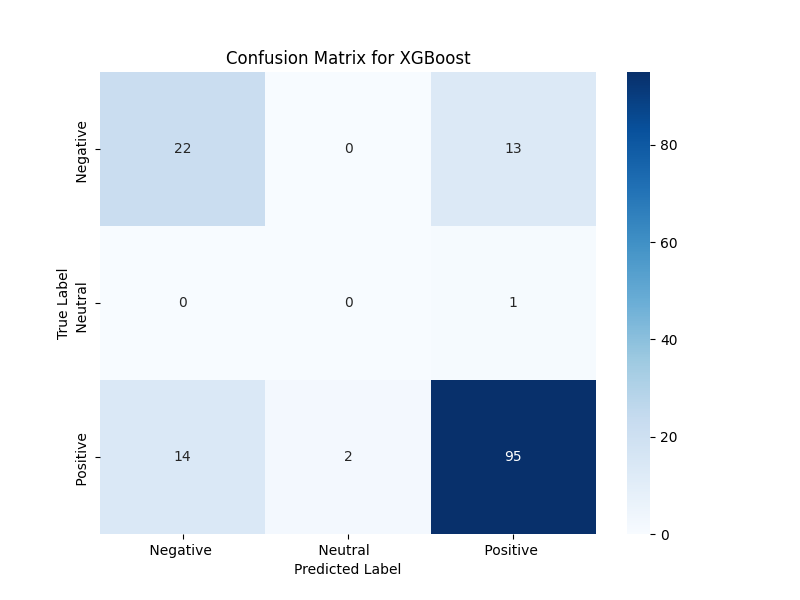

## Model Comparison and Analysis
### Analysis
### Model Performance Summary
- **Logistic Regression** achieved the highest accuracy (0.85) and recall (0.85), along with a high precision (0.85), indicating strong and balanced performance across all metrics.
- **K-Nearest Neighbors (KNN)** reached a high precision (0.84), but its accuracy and recall were lower at 0.55, which may indicate challenges in generalization.
- **Support Vector Machine (SVM)** demonstrated balanced metrics with accuracy at 0.82, precision at 0.83, and recall at 0.82.
- **Decision Tree** showed moderate results with accuracy at 0.67, precision at 0.72, and recall at 0.67, indicating possible issues with class misclassification or overfitting.
- **Random Forest** achieved accuracy, precision, and recall of 0.82, making it consistent and competitive with other high-performing models.
- **AdaBoost** performed reasonably well with an accuracy of 0.75 and a slightly lower precision of 0.73, suggesting it was effective but less consistent compared to other models.
- **XGBoost** had an accuracy of 0.80, with both precision and recall at 0.80, making it fairly reliable but not as strong as the highest-scoring models.
### Best Parameters and Best Model
**Best Parameters:**

- **Logistic Regression:** {'C': 10, 'solver': 'lbfgs'} provided strong performance with high regularization, contributing to better generalization.
- **Random Forest:** The configuration of {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200} yielded consistently high metrics, balancing complexity and generalization.
- **SVM:** The parameter set {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} optimized decision boundary flexibility, enabling good classification accuracy.
#### Best Model Recommendation:

- **Logistic Regression** is recommended as the best model due to its highest accuracy, balanced precision, and recall, making it highly reliable for this dataset.
- *Random Forest* is also a strong choice with similar metrics, offering robustness through its ensemble approach.
- **Final Recommendation:** Logistic Regression is the preferred model for its top metrics and simplicity, while Random Forest is a close alternative if an ensemble method is desired.


## Analysis and Interpretation

Each model's performance has been tracked and recorded using MLFlow, allowing us to compare accuracy, precision, and recall across models. After careful evaluation, the best-performing model based on the chosen metrics can be selected as the final model.

### MLFlow Experiment Tracking Benefits

Using MLFlow for experiment tracking offers several advantages:
- **Comparative Analysis**: Easy comparison across models to identify the optimal model for this classification problem.
- **Reproducibility**: Ensures that experiments are replicable, and all details are logged systematically.
- **Model Management**: Simplifies management of multiple models and their respective configurations.

### Conclusion

Through this assignment, we implemented a complete pipeline for text classification with MLFlow integration. We explored multiple machine learning models, applied rigorous preprocessing, and leveraged MLOps tools to streamline the tracking and management of experiments.
